In [1]:

import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

In [2]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"using PyTorch version: {torch.__version__}, Device: {DEVICE}")
     

using PyTorch version: 2.3.1, Device: cuda


In [4]:

import os
import glob

ROOT_DIR = r'C:\Users\sangy\Documents\pythonCode\data\dog_image' 

label_name_list = os.listdir(os.path.join(ROOT_DIR, 'train'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)
     

total label nums =  4
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']


In [5]:

train_config = transforms.Compose([transforms.Resize((224,224)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor()])

validation_config = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor()])

test_config = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.ToTensor()])

In [7]:
train_dataset = datasets.ImageFolder(os.path.join(ROOT_DIR, 'train'), train_config)

validation_dataset = datasets.ImageFolder(os.path.join(ROOT_DIR, 'validation'), validation_config)

test_dataset = datasets.ImageFolder(os.path.join(ROOT_DIR, 'test'), test_config)

In [8]:

print(train_dataset)

print(validation_dataset)

print(test_dataset)
     

Dataset ImageFolder
    Number of datapoints: 1196
    Root location: C:\Users\sangy\Documents\pythonCode\data\dog_image\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 221
    Root location: C:\Users\sangy\Documents\pythonCode\data\dog_image\validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 63
    Root location: C:\Users\sangy\Documents\pythonCode\data\dog_image\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [9]:
train_class_names = train_dataset.classes # 클래스 이름 출력
train_class_idx = train_dataset.class_to_idx # 클래스 인덱스 출력

print('\ntrain data nums => ', len(train_dataset))
print(train_class_names)
print(train_class_idx)

validation_class_names = validation_dataset.classes # 클래스 이름 출력
validation_class_idx = validation_dataset.class_to_idx # 클래스 인덱스 출력

print('\nvalidation data nums => ', len(validation_dataset))
print(validation_class_names)
print(validation_class_idx)

test_class_names = test_dataset.classes # 클래스 이름 출력
test_class_idx = test_dataset.class_to_idx # 클래스 인덱스 출력

print('\test data nums => ', len(test_dataset))
print(test_class_names)
print(test_class_idx)


train data nums =>  1196
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

validation data nums =>  221
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}
	est data nums =>  63
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


In [10]:

BATCH_SIZE = 32

train_dataset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False)

test_dataset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

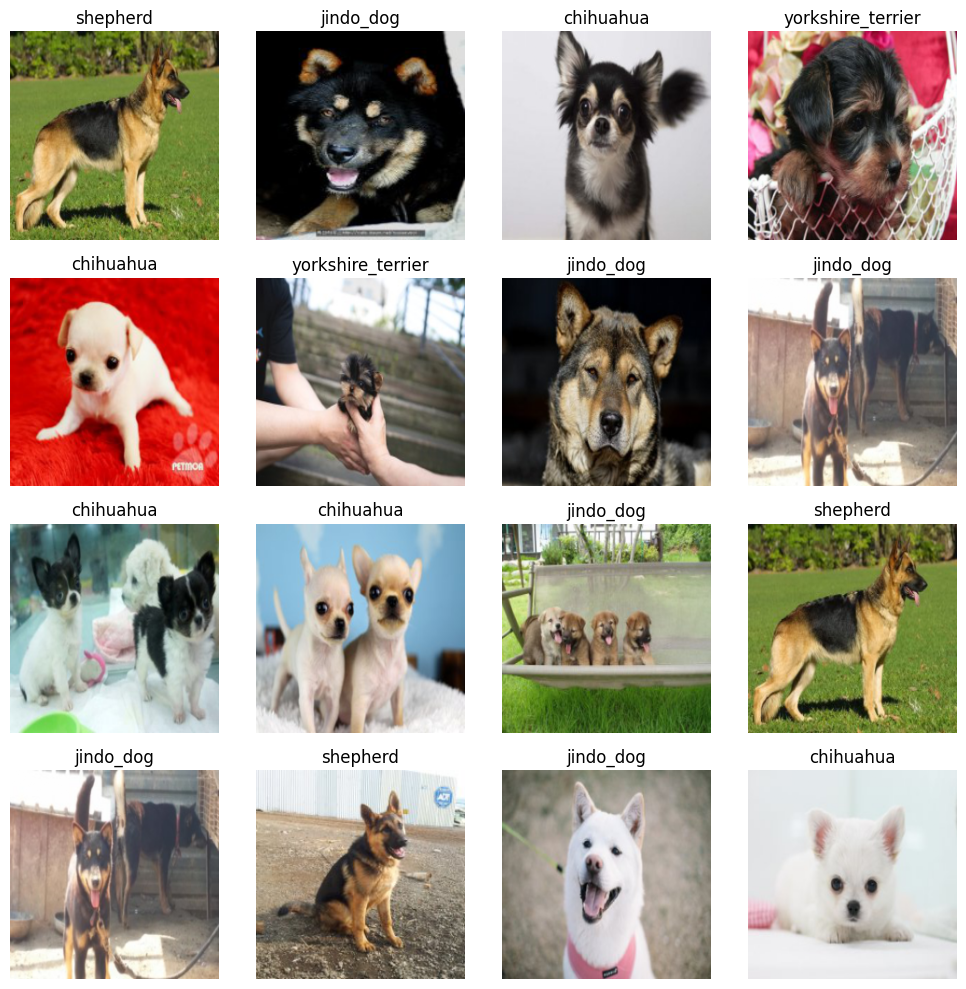

In [11]:
import matplotlib.pyplot as plt

# 1개의 배치를 추출, 현재 32개 이미지-라벨 추출됨
train_images, train_labels = next(iter(train_dataset_loader))

# { class_index : class_name } 생성
labels_map = { class_index:class_name  for class_name, class_index in train_dataset.class_to_idx.items() }

plt.figure(figsize=(10,10))

cols, rows = 4, 4

for pos in range(cols*rows):

    plt.subplot(4,4,pos+1)

    sample_idx = torch.randint(len(train_images), size=(1,)).item()
    img, label = train_images[sample_idx], train_labels[sample_idx].item()

    plt.title(labels_map[label])
    plt.axis('off')

    # 본래 이미지의 shape은 (3, 224, 224) 인데,
    # 이를 imshow() 함수로 이미지 시각화 하기 위하여 (224, 224, 3)으로 shape 변경 후 시각화
    plt.imshow(torch.permute(img, (1, 2, 0)))

plt.tight_layout()
plt.show()

In [12]:

pretrained_model = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)

print(pretrained_model)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [13]:
class MyTransferLearningModel(torch.nn.Module):

    def __init__(self, pretrained_model, feature_extractor):
        super().__init__()

        if (feature_extractor):
            for param in pretrained_model.parameters():
                param.require_grad = False

        pretrained_model.heads = torch.nn.Sequential(
            torch.nn.Linear(pretrained_model.heads[0].in_features, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256, 64),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(64, 4), # 4종류의 강아지 분류이므로 out_features=4로 설정
        )

        self.model = pretrained_model

    def forward(self, data):
        logits = self.model(data)

        return logits

In [14]:
feature_extractor = False  # True: Feature Extractor,  False: Fine Tuning

model = MyTransferLearningModel(pretrained_model, feature_extractor).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-6)

In [15]:

def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:

        x_train = images.to(DEVICE)
        y_train = labels.to(DEVICE)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += ((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100*train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [16]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100*val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [17]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum = test_correct = test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:

            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)

In [18]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

EPOCHS = 40

for epoch in range(EPOCHS):

    #==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(train_dataset_loader, model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #=============================================

    #============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(validation_dataset_loader, model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    #============  model evaluation  ==============

    print('epoch:', '%02d' % (epoch + 1),
          'train loss =', '{:.3f}'.format(train_avg_loss), 'train acc =', '{:.3f}'.format(train_avg_accuracy),
          'val loss =', '{:.3f}'.format(val_avg_loss), 'val acc =', '{:.3f}'.format(val_avg_accuracy))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

c:\pythonEnv\env_torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


epoch: 01 train loss = 1.369 train acc = 31.355 val loss = 1.359 val acc = 46.154
epoch: 02 train loss = 1.353 train acc = 34.866 val loss = 1.343 val acc = 60.181
epoch: 03 train loss = 1.339 train acc = 41.639 val loss = 1.326 val acc = 69.683
epoch: 04 train loss = 1.324 train acc = 43.980 val loss = 1.308 val acc = 72.851
epoch: 05 train loss = 1.305 train acc = 48.829 val loss = 1.287 val acc = 73.756
epoch: 06 train loss = 1.283 train acc = 52.843 val loss = 1.261 val acc = 77.376
epoch: 07 train loss = 1.260 train acc = 56.271 val loss = 1.232 val acc = 78.281
epoch: 08 train loss = 1.227 train acc = 61.204 val loss = 1.198 val acc = 82.353
epoch: 09 train loss = 1.194 train acc = 65.217 val loss = 1.161 val acc = 84.615
epoch: 10 train loss = 1.162 train acc = 68.645 val loss = 1.119 val acc = 85.973
epoch: 11 train loss = 1.127 train acc = 69.732 val loss = 1.076 val acc = 89.593
epoch: 12 train loss = 1.101 train acc = 73.161 val loss = 1.034 val acc = 90.498
epoch: 13 train 